In [77]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
import numpy as np

In [75]:
def plot_decision_regions( X, y, classifier, test_idx = None, res = 0.02 ):

    colors = ("red", "green", "blue", "yellow", "orange", "pink")
    markers = ( "o", "v", "^", "s", "<" )
    cmap = ListedColormap( colors[: len( np.unique(y))] )

    x1_min, x1_max =  X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max =  X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid( np.arange( x1_min, x1_max, res ),
                            np.arange( x2_min, x2_max, res ))

    prdct = np.array( [xx1.ravel(), xx2.ravel()] ).T
    lab = classifier.predict( prdct )
    lab = lab.reshape( xx1.shape )

    plt.contour( xx1, xx2, lab, alpha = 0.3, cmap = cmap )
    plt.xlim( xx1.min(), xx1.max() )
    plt.ylim( xx2.min(), xx2.max() )

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter( x = X[ y == cl, 0],
                     y = X[ y == cl, 1],
                     alpha = 0.8,
                     c = colors[idx],
                     marker = markers[idx],
                     label = f"Class : {cl}",
                     edgecolor = "black")
        
    if test_idx:
        X_test, Y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='none', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='Test set')

In [39]:
np.random.seed(0)

X_xor = np.random.randn(200,2)
y_xor = np.logical_xor( X_xor[:, 0] > 0 , X_xor[:, 1] > 0 )
y_xor = np.where( y_xor, 1, 0 )

In [65]:
print(X_xor[y_xor == 0, 0].shape)
print(X_xor[y_xor == 1, 0].shape)

(200,)
(200,)


In [66]:
x1 = X_xor[ y_xor == 1, 0]
y1 = X_xor[ y_xor == 1, 1]

x2 = X_xor[ y_xor == 0, 0]
y2 = X_xor[ y_xor == 0, 1]

In [61]:
y1.size

101

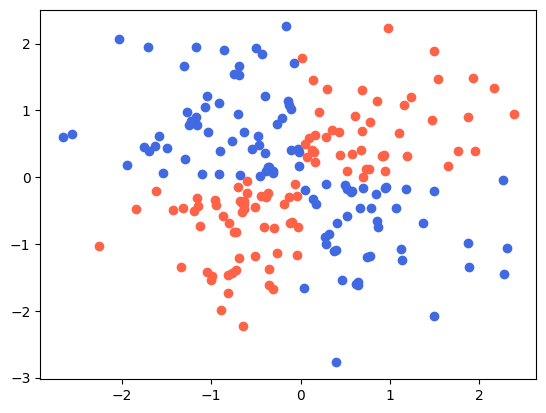

In [71]:
plt.scatter( x1, y1, c = "royalblue", label = "o" )
plt.scatter( x2, y2, c = "tomato", label = "s" )
plt.show()

In [94]:
svm = SVC( kernel = "rbf", gamma = 0.1, C = 40.0 )

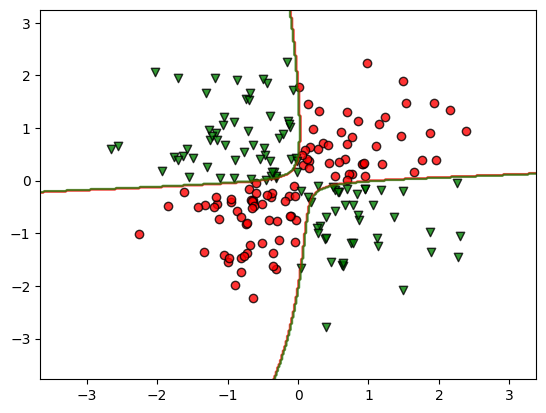

In [95]:
svm.fit( X_xor, y_xor )
plot_decision_regions( X_xor, y_xor, svm)